Import Libraries, read file, and take a first look.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
data = pd.read_csv('WHO Life Expectancy Data.csv')

In [226]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Data Cleaning**

Wow this data set is not cut and dry. We have 2938 entriess and features with 0 - 652 null values! 

Some solid data cleaning is in order. We will be cleaning the data by either filling in the mean, like we do with 'Life Expectancy', or the mean of other variables that correlate the strongest with the null varialbe. 

20 Quantitative and 2 Qualitative features. Obvious nul vallues.

First we will rename the variables.

In [228]:
data.rename(columns={" BMI ":"BMI",
                     "Adult Mortality":"Adult_Mortality",
                     "infant deaths":"Infant_Deaths",
                     "percentage expenditure":"Percentage_Exp",
                     "Hepatitis B":"HepatitisB",
                     "Measles ":"Measles",
                     " BMI ":"BMI",
                     "under-five deaths ":"Under_Five_Deaths",
                     " HIV/AIDS":"HIV/AIDS",
                     " thinness  1-19 years":"Thinness_1to19_years",
                     " thinness 5-9 years":"Thinness_5to9_years",
                     "Income composition of resources":"Income_Comp_Of_Resources",
                     "Life expectancy ":"Life_Expectancy",
                     "Total expenditure":"Total_Exp",
                    "Diphtheria ":"Diphtheria",
                    "Diptheria":"Diphtheria"},
            inplace=True)

In [229]:
#for loop to find number of null values
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,10
4,Adult_Mortality,10
5,Infant_Deaths,0
6,Alcohol,194
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


We will fill the null values of 'Life Expectancy' and 'Adult Mortality'  with their average value.

In [20]:
# This piece of code will fill the null values of the selected feature with its mean.

data['Life_Expectancy']=data['Life_Expectancy'].fillna(value=data['Life_Expectancy'].mean())

data['Adult_Mortality']=data['Adult_Mortality'].fillna(value=data['Adult_Mortality'].mean())

To fill in the other Nans lets look at finding a correlation that would help us create a model of best fit. 

In [21]:
corr_data=data.corr()
corr_data

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1to19_years,Thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life_Expectancy,0.169623,1.000000,-0.696359,-0.196535,0.404029,0.381791,0.255760,-0.157574,0.564466,-0.222503,0.464531,0.216373,0.478465,-0.556457,0.461393,-0.021548,-0.476561,-0.470977,0.724631,0.748263
Adult_Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.195454,-0.242814,-0.161828,0.031174,-0.384806,0.094135,-0.274218,-0.114355,-0.274540,0.523727,-0.296019,-0.013639,0.302501,0.308053,-0.457530,-0.452380
Infant_Deaths,-0.037415,-0.196535,0.078747,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404029,-0.195454,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage_Exp,0.031400,0.381791,-0.242814,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,0.104333,0.255760,-0.161828,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.564466,-0.384806,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under_Five_Deaths,-0.042937,-0.222503,0.094135,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


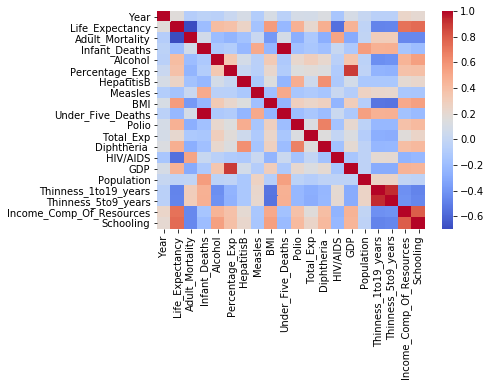

In [22]:
sns.heatmap(corr_data, cmap='coolwarm')

Alcohol's strongest correlation variable is Schooling with a value of 0.547378.

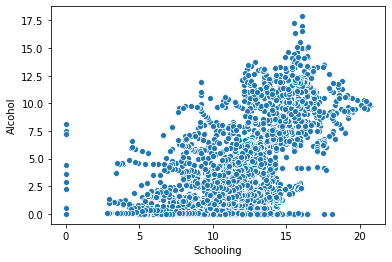

In [23]:
sns.scatterplot(x=data['Schooling'],y=data['Alcohol']);

#The semicolon atlast in the code is to hide the address of the plot which is not required but I personally like doing that

In [30]:
#Find the mean of 'Alcohol' for segments of 'Schooling'

data[data['Schooling']<=2.5]['Alcohol'].mean()

3.433529411764705

In [31]:
data[(data['Schooling']>2.5) & (data['Schooling']<=5.0)]['Alcohol'].mean()

1.5655769230769236

In [32]:
data[(data['Schooling']>5) & (data['Schooling']<=7.5)]['Alcohol'].mean()

1.3312426035502958

In [34]:
data[(data['Schooling']>7.5) & (data['Schooling']<=10.0)]['Alcohol'].mean()

2.3817910447761172

In [35]:
data[(data['Schooling']>10) & (data['Schooling']<=15)]['Alcohol'].mean()

4.181193829644551

In [36]:
data[data['Schooling']>15]['Alcohol'].mean()

9.003965141612209

In [40]:
# These values are mean values of the selected interval of other feature.

def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc <= 2.5:
            return 3.7
        elif 2.5 <sc<=5.0:
            return 1.6
        elif 5.0<sc<=7.5:
            return 1.4
        elif 7.5<sc<=10.0:
            return 2.4
        elif 10.0<sc<=15:
            return 4.2
        elif sc>15:
            return 9.1
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol, axis=1)

In [41]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,9
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


In [44]:
#filling the remaining null values with it's mean.
data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

The next null value to fill in is 'Hepatatis B' which highly correlates with 'Diptheria' at 0.61. Unfortanetyly they have null vallues in the same row, which means we will need to look at other correlations. 

'Diptheria' strongly correlates to 'Polio' at 0.67, but we are in the same problem, both have null values in the same zone. 

Have no fear as we can imput 'Polio' with 'Life excpectancy' which correlates at 0.46. We are entering into moderate correlation status between these two variables. 

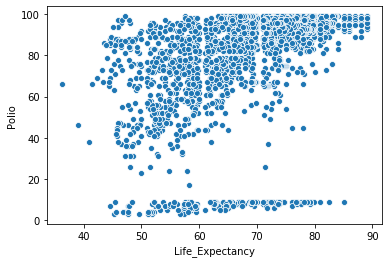

In [46]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Polio']);

I am using the mean of a segmented part of variables to add in the null values to get more accurate data, rather than just filling in the data with the overall mean. 

In [48]:
data[data['Life_Expectancy']<=50]['Polio'].mean()

61.688

In [49]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['Polio'].mean()

63.27850877192982

In [50]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['Polio'].mean()

79.62707182320442

In [51]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['Polio'].mean()

90.29390154298311

In [58]:
data[data['Life_Expectancy']>80]['Polio'].mean()

94.300395256917

In [59]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=50:
            return 61.7
        elif 50<l<=60:
            return 63.3
        elif 60<l<=70:
            return 79.6
        elif 70<l<=80:
            return 90.3
        elif l>80:
            return 94.3
    else:
        return p
    
data['Polio']=data[['Polio','Life_Expectancy']].apply(impute_polio,axis=1)

Let's see if the above code did what we wanted and replaced all the null values of 'Polio'

In [55]:
a = list(data.columns)
b = []
for i in a:
    c = data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a, 'no. of Nan' :b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,553
9,Measles,0


Rock and roll, we got em. Next we will use our new filled in 'Polio' column to fill in 'Diphteria'

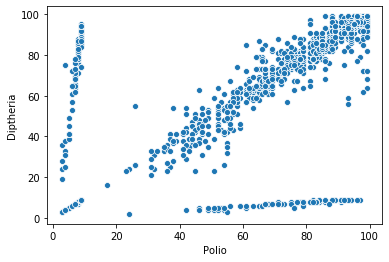

In [72]:
sns.scatterplot(x=data['Polio'],y=data['Diptheria']);

In [86]:
#Find the mean of 'Diphtheria' from segments of 'Polio'
data[data['Polio']<=20]['Diphtheria'].mean()

48.78034682080925

In [88]:
data[(data['Polio']>20) & (data['Polio']<=40)]['Diphtheria'].mean()

31.517241379310345

In [89]:
data[(data['Polio']>40) & (data['Polio']<=60)]['Diphtheria'].mean()

43.56172839506173

In [91]:
data[(data['Polio']>60) & (data['Polio']<=80)]['Diphtheria'].mean()

67.07582938388626

In [93]:
data[data['Polio']>=80]['Diphtheria'].mean()

91.69620253164557

In [107]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=20:
            return 48.8
        elif 20<p<=40:
            return 31.5
        elif 40<p<=60:
            return 43.6
        elif 60<p<=80:
            return 67.1
        elif 80<p:
            return 91.7
    else:
        return d
data['Diphtheria']=data[['Diphtheria', 'Polio']].apply(impute_Diptheria, axis=1)

In [108]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df


,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,19
9,Measles,0


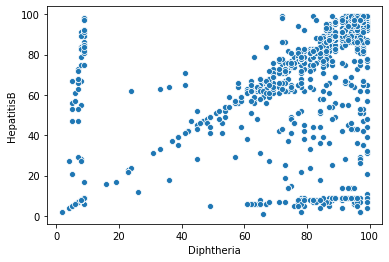

In [43]:
sns.scatterplot(x=data['Diphtheria'],y=data['HepatitisB']);

In [95]:
data[data['Diphtheria']<=40]['HepatitisB'].mean()

36.093525179856115

In [96]:
data[(data['Diphtheria']>40) & (data['Diphtheria']<=50)]['HepatitisB'].mean()

44.827586206896555

In [97]:
data[(data['Diphtheria']>50) & (data['Diphtheria']<=60)]['HepatitisB'].mean()

53.0

In [98]:
data[(data['Diphtheria']>60) & (data['Diphtheria']<=70)]['HepatitisB'].mean()

57.92727272727273

In [99]:
data[(data['Diphtheria']>70) & (data['Diphtheria']<=80)]['HepatitisB'].mean()

66.34482758620689

In [100]:
data[(data['Diphtheria']>80) & (data['Diphtheria']<=90)]['HepatitisB'].mean()

78.84119106699752

In [187]:
data[data['Diphtheria']>=90]['HepatitisB'].mean()

91.05704057279279

In [109]:
def impute_HepatatisB(cols):
    hep=cols[0]
    dip=cols[1]
    if pd.isnull(hep):
        if dip<=40:
            return 36.1
        elif 40<dip<=50:
            return 44.8
        elif 50<dip<=60:
            return 53.0
        elif 60<dip<=70:
            return 57.9
        elif 70<dip<=80:
            return 66.3
        elif 80<dip<=90:
            return 78.8
        elif dip>90:
            return 91.1
    else:
        return hep
    
data['HepatitisB']=data[['HepatitisB','Diphtheria']].apply(impute_HepatatisB,axis=1)

In [110]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df


,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,0
9,Measles,0


##### Here is a list of the variables we will be correlating and imputing:

-Impute 'BMI' with 'Life_Expactancy'.

-Impute 'Total_Exp' with 'Alcohol'.

-Impute 'GDP' with 'Percentage_Exp'.

-Impute 'Population' with 'Infant_Deaths'.

-Impute 'Thinness_1to19_years' with 'BMI'.

-Impute 'Thinness_5to9_years' with 'BMI'.

-Impute 'Schooling' and 'Income_Comp_of_Resources' with 'Life_Expactancy'. 



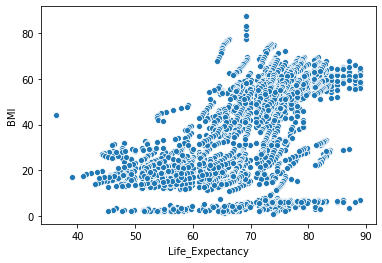

In [111]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['BMI']);

Hey I learned how to filter my data and then run the mean. No more need for querries! 

In [112]:
data[data['Life_Expectancy']<=50.0]['BMI'].mean()

19.362400000000004

In [113]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['BMI'].mean()

19.12589285714285

In [114]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['BMI'].mean()

32.97172995780591

In [115]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['BMI'].mean()

46.81967812728601

In [116]:
data[data['Life_Expectancy']>80.0]['BMI'].mean()

50.79367588932805

In [117]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 19.4
        elif 50<l<=60:
            return 19.1
        elif 60<l<=70:
            return 33
        elif 70<l<=80:
            return 46.8
        elif 80<l:
            return 50.8
    else:
        return b
    
data['BMI']=data[['BMI','Life_Expectancy']].apply(impute_BMI,axis=1)

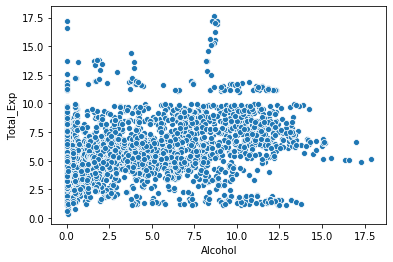

In [118]:
sns.scatterplot(y=data['Total_Exp'],x=data['Alcohol']);

In [119]:
data[data['Alcohol']<=2.5]['Total_Exp'].mean()

5.08741302408563

In [120]:
data[(data['Alcohol']>2.5) & (data['Alcohol']<=5)]['Total_Exp'].mean()

6.025063025210081

In [121]:
data[(data['Alcohol']>5) & (data['Alcohol']<=7.5)]['Total_Exp'].mean()

6.315833333333337

In [122]:
data[(data['Alcohol']>7.5) & (data['Alcohol']<=10)]['Total_Exp'].mean()

7.15888252148997

In [123]:
data[(data['Alcohol']>10) & (data['Alcohol']<=12.5)]['Total_Exp'].mean()

6.899100346020762

In [124]:
data[data['Alcohol']>12.5]['Total_Exp'].mean()

6.667777777777778

In [125]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.09
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<7.5:
            return 6.3
        elif 7.5<a<=10.0:
            return 7.2
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.7
    else:
        return t
    
data['Total_Exp']=data[['Total_Exp','Alcohol']].apply(impute_Total_exp,axis=1)    

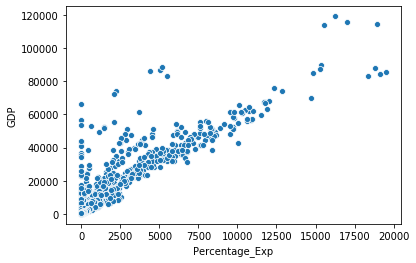

In [126]:
sns.scatterplot(x=data['Percentage_Exp'],y=data['GDP']);

In [127]:
data[data['Percentage_Exp']<=1250]['GDP'].mean()

2937.5602309464625

In [128]:
data[(data['Percentage_Exp']>1250) & (data['Percentage_Exp']<=2500)]['GDP'].mean()

18457.317701105694

In [129]:
data[(data['Percentage_Exp']>2500) & (data['Percentage_Exp']<=3750)]['GDP'].mean()

28719.604417377068

In [130]:
data[(data['Percentage_Exp']>3750) & (data['Percentage_Exp']<=7500)]['GDP'].mean()

39217.118505825245

In [131]:
data[(data['Percentage_Exp']>7500) & (data['Percentage_Exp']<=8750)]['GDP'].mean()

48372.835215384606

In [132]:
data[(data['Percentage_Exp']>8750) & (data['Percentage_Exp']<=10000)]['GDP'].mean()

54822.896244545445

In [133]:
data[(data['Percentage_Exp']>10000) & (data['Percentage_Exp']<=11250)]['GDP'].mean()

58842.19107307692

In [134]:
data[(data['Percentage_Exp']>11250) & (data['Percentage_Exp']<=12500)]['GDP'].mean()

67018.11323285714

In [135]:
data[(data['Percentage_Exp']>12500) & (data['Percentage_Exp']<=15000)]['GDP'].mean()

76305.27524666667

In [136]:
data[(data['Percentage_Exp']>15000) & (data['Percentage_Exp']<=17500)]['GDP'].mean()

105214.526792

In [137]:
data[data['Percentage_Exp']>17500]['GDP'].mean()

91186.030436

In [138]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 2937.6
        elif 1250<p<=2500:
            return 18457.3
        elif 2500<p<=3750:
            return 28719.6
        elif 3750<p<=7500:
            return 39217.1
        elif 7500<p<=8750:
            return 48372.8
        elif 8750<p<=10000:
            return 54822.9
        elif 10000<p<=11250:
            return 58842.2
        elif 11250<p<=12500:
            return 67018.1
        elif 12500<p<=15000:
            return 76305.3
        elif 15000<p<=17500:
            return 105214.5
        elif p>17500:
            return 91186.0
    else:
        return g
    
data['GDP']=data[['GDP','Percentage_Exp']].apply(impute_GDP,axis=1)

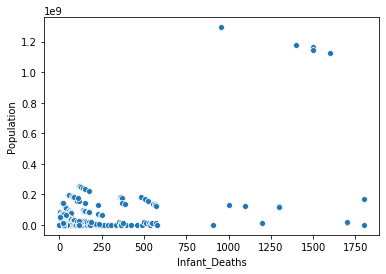

In [139]:
sns.scatterplot(x=data['Infant_Deaths'],y=data['Population']);

In [140]:
data[data['Infant_Deaths']<=100]['Population'].mean()

7695546.875260488

In [141]:
data[(data['Infant_Deaths']>100) & (data['Infant_Deaths']<=250)]['Population'].mean()

57794437.81355932

In [142]:
data[(data['Infant_Deaths']>250) & (data['Infant_Deaths']<=350)]['Population'].mean()

13841271.0

In [143]:
data[(data['Infant_Deaths']>350) & (data['Infant_Deaths']<=900)]['Population'].mean()

60540894.89189189

In [144]:
data[(data['Infant_Deaths']>900) & (data['Infant_Deaths']<=1100)]['Population'].mean()

334840080.0

In [145]:
data[(data['Infant_Deaths']>1100) & (data['Infant_Deaths']<=1250)]['Population'].mean()

12398691.0

In [146]:
data[(data['Infant_Deaths']>1250) & (data['Infant_Deaths']<=1500)]['Population'].mean()

745383892.0

In [147]:
data[(data['Infant_Deaths']>1500) & (data['Infant_Deaths']<=1750)]['Population'].mean()

385650245.6666667

In [148]:
data[data['Infant_Deaths']>1750]['Population'].mean()

86506883.5

In [149]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 7695546.9
        elif 100<i<=250:
            return 57794437.8
        elif 250<i<=350:
            return 13841271.0
        elif 350<i<=900:
            return 60540894.9
        elif 900<i<=1100:
            return 334840080.0
        elif 1100<i<=1250:
            return 12398691.0
        elif 1250<i<=1500:
            return 745383892.0
        elif 1500<i<=1750:
            return 385650245.7
        elif i>1750:
            return 86506883.5
    else:
        return p
    
data['Population']=data[['Population','Infant_Deaths']].apply(impute_population,axis=1)

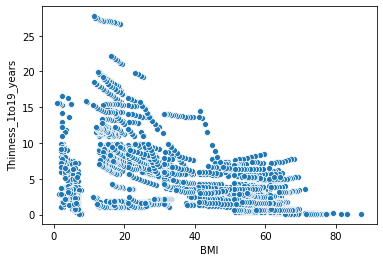

In [150]:
sns.scatterplot(x=data['BMI'],y=data['Thinness_1to19_years']);

In [151]:
data[data['BMI']<=10]['Thinness_1to19_years'].mean()

4.569964664310953

In [152]:
data[(data['BMI']>10) & (data['BMI']<=20)]['Thinness_1to19_years'].mean()

10.049180327868845

In [153]:
data[(data['BMI']>20) & (data['BMI']<=30)]['Thinness_1to19_years'].mean()

7.108641975308639

In [154]:
data[(data['BMI']>30) & (data['BMI']<=40)]['Thinness_1to19_years'].mean()

5.617000000000003

In [155]:
data[(data['BMI']>40) & (data['BMI']<=50)]['Thinness_1to19_years'].mean()

3.3408740359897147

In [156]:
data[(data['BMI']>50) & (data['BMI']<=70)]['Thinness_1to19_years'].mean()

2.306974637681159

In [157]:
data[data['BMI']>70]['Thinness_1to19_years'].mean()

0.23714285714285707

In [158]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 4.6
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 7.1
        elif 30<b<=40:
            return 5.6
        elif 40<b<=50:
            return 3.3
        elif 50<b<=70:
            return 2.3
        elif b>70:
            return 0.23
    else:
        return t
    
data['Thinness_1to19_years']=data[['Thinness_1to19_years','BMI']].apply(impute_Thin_1,axis=1)

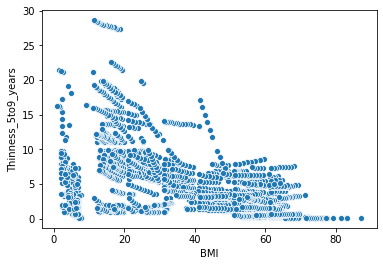

In [159]:
sns.scatterplot(x=data['BMI'],y=data['Thinness_5to9_years']);

In [160]:
data[data['BMI']<=10]['Thinness_5to9_years'].mean()

4.875618374558303

In [161]:
data[(data['BMI']>10) & (data['BMI']<=20)]['Thinness_5to9_years'].mean()

10.076639344262292

In [162]:
data[(data['BMI']>20) & (data['BMI']<=30)]['Thinness_5to9_years'].mean()

7.163950617283943

In [163]:
data[(data['BMI']>30) & (data['BMI']<=40)]['Thinness_5to9_years'].mean()

5.610500000000002

In [164]:
data[(data['BMI']>40) & (data['BMI']<=50)]['Thinness_5to9_years'].mean()

3.3750642673521796

In [165]:
data[(data['BMI']>50) & (data['BMI']<=70)]['Thinness_5to9_years'].mean()

2.266757246376818

In [166]:
data[data['BMI']>70]['Thinness_5to9_years'].mean()

0.20857142857142838

In [167]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 4.9
        elif 10<b<=20:
            return 10.1
        elif 20<b<=30:
            return 7.2
        elif 30<b<=40:
            return 5.6
        elif 40<b<=50:
            return 3.4
        elif 50<b<=70:
            return 2.3
        elif b>70:
            return 0.21
    else:
        return t
    
data['Thinness_5to9_years']=data[['Thinness_5to9_years','BMI']].apply(impute_Thin_1,axis=1)

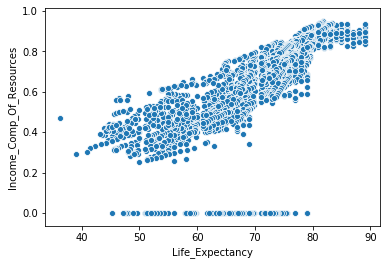

In [168]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Income_Comp_Of_Resources']);


In [169]:
data[data['Life_Expectancy']<=40]['Income_Comp_Of_Resources'].mean()

0.381

In [170]:
data[(data['Life_Expectancy']>40) & (data['Life_Expectancy']<=50)]['Income_Comp_Of_Resources'].mean()

0.3712434782608695

In [171]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['Income_Comp_Of_Resources'].mean()

0.40212048192771105

In [172]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['Income_Comp_Of_Resources'].mean()

0.5412112879884231

In [173]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['Income_Comp_Of_Resources'].mean()

0.7198969465648863

In [174]:
data[data['Life_Expectancy']>80]['Income_Comp_Of_Resources'].mean()

0.8889369747899157

In [175]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.38
        elif 40<l<=50:
            return 0.37
        elif 50<l<=60:
            return 0.40
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.72
        elif l>80:
            return 0.89
    else:
        return i
        
data['Income_Comp_Of_Resources']=data[['Income_Comp_Of_Resources','Life_Expectancy']].apply(impute_Income,axis=1) 

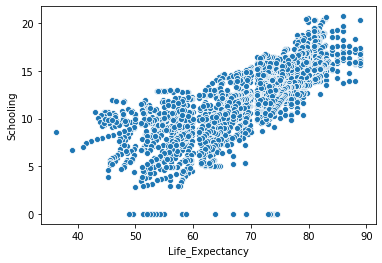

In [176]:
sns.scatterplot(x=data['Life_Expectancy'],y=data['Schooling']);

In [177]:
data[data['Life_Expectancy']<=40]['Schooling'].mean()

7.65

In [178]:
data[(data['Life_Expectancy']>40) & (data['Life_Expectancy']<=44)]['Schooling'].mean()

8.825

In [179]:
data[(data['Life_Expectancy']>44) & (data['Life_Expectancy']<=50)]['Schooling'].mean()

8.102803738317757

In [180]:
data[(data['Life_Expectancy']>50) & (data['Life_Expectancy']<=60)]['Schooling'].mean()

8.211807228915664

In [181]:
data[(data['Life_Expectancy']>60) & (data['Life_Expectancy']<=70)]['Schooling'].mean()

10.541582733812959

In [182]:
data[(data['Life_Expectancy']>70) & (data['Life_Expectancy']<=80)]['Schooling'].mean()

13.483435114503811

In [183]:
data[data['Life_Expectancy']>80]['Schooling'].mean()

16.510504201680675

In [184]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 7.65
        elif 40<l<=44:
            return 8.3
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.21
        elif 60<l<=70:
            return 10.54
        elif 70<l<=80:
            return 13.48
        elif l>80:
            return 16.51
    else:
        return s
    
data['Schooling']=data[['Schooling','Life_Expectancy']].apply(impute_schooling,axis=1)

In [185]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life_Expectancy,0
4,Adult_Mortality,0
5,Infant_Deaths,0
6,Alcohol,0
7,Percentage_Exp,0
8,HepatitisB,0
9,Measles,0


Damn thats beautiful. I am going to take a walk now. 

Back from the walk.

Since our target(y) variable is Life_Expectancy let's look at its distribution.

In [135]:
y=data['Life_Expectancy']

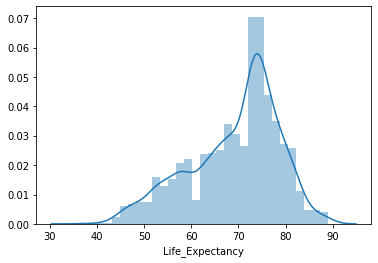

In [136]:
sns.distplot(y);

Almost normal distribution w/ negative skew. 

Naturally lets check out our X or Predictors dataset.

In [188]:
X=data.drop('Life_Expectancy',axis=1)

In [189]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Adult_Mortality           2938 non-null   float64
 4   Infant_Deaths             2938 non-null   int64  
 5   Alcohol                   2938 non-null   float64
 6   Percentage_Exp            2938 non-null   float64
 7   HepatitisB                2938 non-null   float64
 8   Measles                   2938 non-null   int64  
 9   BMI                       2938 non-null   float64
 10  Under_Five_Deaths         2938 non-null   int64  
 11  Polio                     2938 non-null   float64
 12  Total_Exp                 2938 non-null   float64
 13  Diphtheria                2938 non-null   float64
 14  HIV/AIDS

Two datatypes are objects. Look into these and then make them floats or ints. 

In [190]:
X['Country'].nunique()

193

In [191]:
X['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

Build dummy variables for the objects to fit the model. 

In [193]:
Country_Dummy=pd.get_dummies(X['Country'])

In [194]:
Status_dummy=pd.get_dummies(X['Status'])

Now that we have the variables, lets combine them with our X dataset. To make things less confusing we will drop the object variables and then concatenate. 

In [195]:
X.drop(['Country','Status'],inplace=True,axis=1)

In [197]:
X=pd.concat([X,Country_Dummy,Status_dummy],axis=1)

In [198]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [199]:
X.head()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


**Modeling**

We will be using Linear Regression. First spliting the model 30% for testing and 70% for training the model. 

In [200]:
from sklearn.model_selection import train_test_split

In [202]:
y=data['Life_Expectancy']

In [203]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=101)

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
Linear_model= LinearRegression()

In [206]:
Linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
LRpredictions1=Linear_model.predict(X_test)

In [208]:
LRpredictions1[0:10]

array([53.03586096, 54.38264002, 83.5567575 , 63.41162784, 73.59482583,
       72.45365179, 69.21741194, 80.39253957, 60.74887732, 82.95432621])

The above values of 'Life_Expectancy' seem within reason. Lets use Root Mean Square Error to get more information on our model, as well as, the R square value.

In [209]:
from sklearn.metrics import mean_squared_error

In [210]:
print(mean_squared_error(y_test,LRpredictions1)**(0.5))

1.9132493156893684


In [211]:
from sklearn.metrics import r2_score

In [212]:
r2_score(y_test,LRpredictions1)

0.9577021930029278

Our model looks pretty good.

|Field|Description|
|---:|:---|
|Country|Country|
|Year|Year|
|Status|Developed or Developing status|
|Life expectancy|Life Expectancy in age|
|Adult Mortality|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)|
|infant deaths|Number of Infant Deaths per 1000 population|
|Alcohol|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)|
|percentage expenditure|Expenditure on health as a percene of Gross Domestic Product per capita(%)|
|Hepatitis B|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)|
|Measles|Measles - number of reported cases per 1000 population|
|BMI|Average Body Mass Index of entire population|
|under-five deaths|Number of under-five deaths per 1000 population|
|Polio|Polio (Pol3) immunization coverage among 1-year-olds (%)|
|Total expenditure|General government expenditure on health as a percene of total government expenditure (%)|
|Diphtheria|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)|
|HIV/AIDS|Deaths per 1 000 live births HIV/AIDS (0-4 years)|
|GDP|Gross Domestic Product per capita (in USD)|
|Population|Population of the country|
|thinness 1-19 years|Prevalence of thinness among children and adolescents for Age 10 to 19 (%)|
|thinness 5-9 years|Prevalence of thinness among children for Age 5 to 9(%)|
|Income composition of resources|Income composition of resources|
|Schooling|Number of years of Schooling(years)|

## Insights

### The better economy you are in the higher life expectancy you can anticipate. 

The two top indicators contributing to higher 'Life_Expectancy': 'Schooling' & 'Income_Comp_of_Resources.

In [213]:
data.corr()['Life_Expectancy'][:].sort_values(ascending=False)

Life_Expectancy             1.000000
Schooling                   0.757592
Income_Comp_Of_Resources    0.734801
BMI                         0.568145
Diphtheria                  0.479904
Polio                       0.467146
GDP                         0.431653
Alcohol                     0.409865
HepatitisB                  0.383386
Percentage_Exp              0.381791
Total_Exp                   0.220730
Year                        0.169623
Population                 -0.033168
Measles                    -0.157574
Infant_Deaths              -0.196535
Under_Five_Deaths          -0.222503
Thinness_5to9_years        -0.477051
Thinness_1to19_years       -0.482628
HIV/AIDS                   -0.556457
Adult_Mortality            -0.696359
Name: Life_Expectancy, dtype: float64

The feature most negatively affecting 'Life_Expectancy' is Adult Mortality. (Rates of both sexes probability of dying between 15 and 60 years per 1000 population)

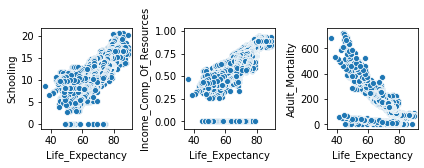

In [214]:
%matplotlib inline
import matplotlib as mpl

plt.subplot(2,3,1)
sns.scatterplot(x=data['Life_Expectancy'],y=data['Schooling']);
plt.subplot(2,3,2)
sns.scatterplot(x=data['Life_Expectancy'],y=data['Income_Comp_Of_Resources']);
plt.subplot(2,3,3)
sns.scatterplot(x=data['Life_Expectancy'],y=data['Adult_Mortality']);

plt.tight_layout()
plt.show()

In [215]:
School = data[['Schooling']]
LE = data[['Life_Expectancy']]

### Digging into Schooling & Life Expectancy

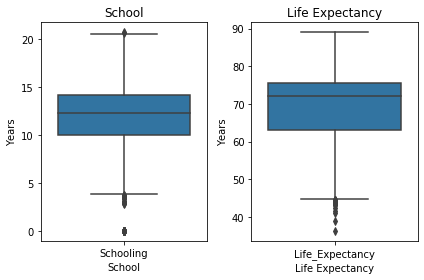

In [216]:
%matplotlib inline
import matplotlib as mpl

plt.subplot(1,2,1)
sns.boxplot(data = School)
plt.title('School')
plt.xlabel('School')
plt.ylabel('Years')
mpl.rcParams['figure.figsize'] = (25,25)

plt.subplot(1,2,2)
sns.boxplot(data = LE)
plt.xlabel('Life Expectancy')
plt.ylabel('Years')
plt.title('Life Expectancy')

plt.tight_layout()
plt.show()

School range is from 0-20 w/ average years in school: 12.3 Years.
Average life expectancy is 72 years

If you spend two years schooling after highschool correlates to 3.5 years increase to your life. 

On the extreme end hitting 6 years or roughly a masters degree will correlates to life expectancy rates to 90 years or 27 years above the average. 

**JY Joke:**
Why do you live 27 yearslonger if you have a masters degree?
Because that's how much time you need to pay it off. ba dump cha.

In [217]:
data['Life_Expectancy'].describe()

count    2938.000000
mean       69.224932
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: Life_Expectancy, dtype: float64

In [218]:
data['Schooling'].describe()

count    2938.000000
mean       11.950167
std         3.335760
min         0.000000
25%        10.000000
50%        12.300000
75%        14.200000
max        20.700000
Name: Schooling, dtype: float64

In [219]:
data['Income_Comp_Of_Resources'].describe()

count    2938.000000
mean        0.624797
std         0.209021
min         0.000000
25%         0.488250
50%         0.675500
75%         0.774750
max         0.948000
Name: Income_Comp_Of_Resources, dtype: float64

### Digging into Income Composition of Resources

This is a score from 0 - 10 on how well countries prioritize their resources. 

The chart is of the top ten hightest scores of ICOR.

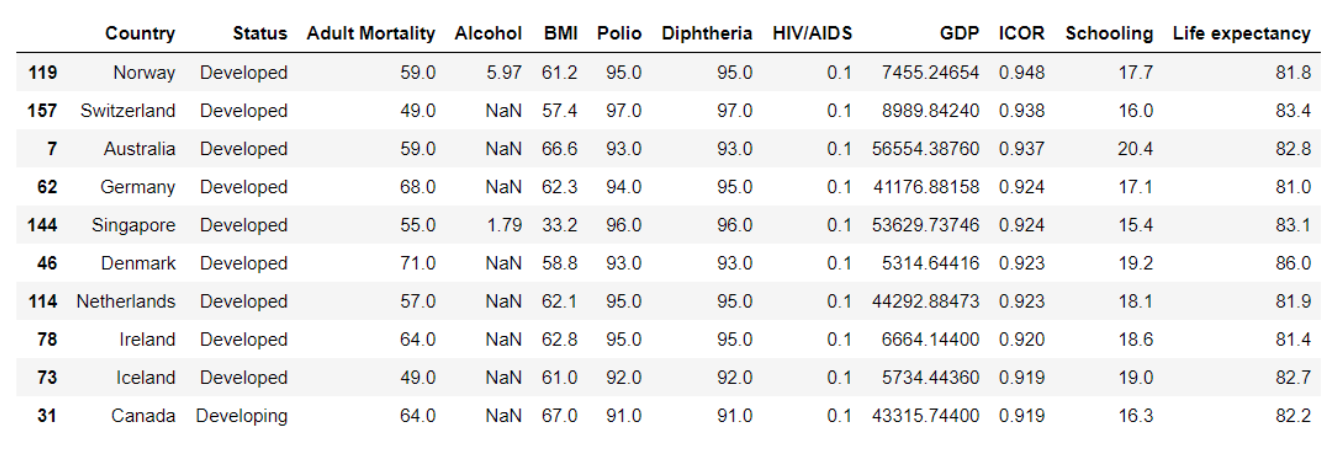

The top ten countries all have ICOR scores between 91.9% - 94.8% with their citizenzes average life expectancy 81+. 

### Digging into Adult Mortality

In [220]:
data.corr()['Adult_Mortality'][:].sort_values(ascending=False)

Adult_Mortality             1.000000
HIV/AIDS                    0.523727
Thinness_5to9_years         0.315254
Thinness_1to19_years        0.309846
Under_Five_Deaths           0.094135
Infant_Deaths               0.078747
Measles                     0.031174
Population                 -0.004330
Year                       -0.078861
Total_Exp                  -0.118450
Alcohol                    -0.202326
HepatitisB                 -0.223896
Percentage_Exp             -0.242814
Diphtheria                 -0.276829
Polio                      -0.277434
GDP                        -0.281265
BMI                        -0.389781
Schooling                  -0.470062
Income_Comp_Of_Resources   -0.474515
Life_Expectancy            -0.696359
Name: Adult_Mortality, dtype: float64

From the data HIV/AIDS has the highest contributor to Adult Mortality

# End Insights